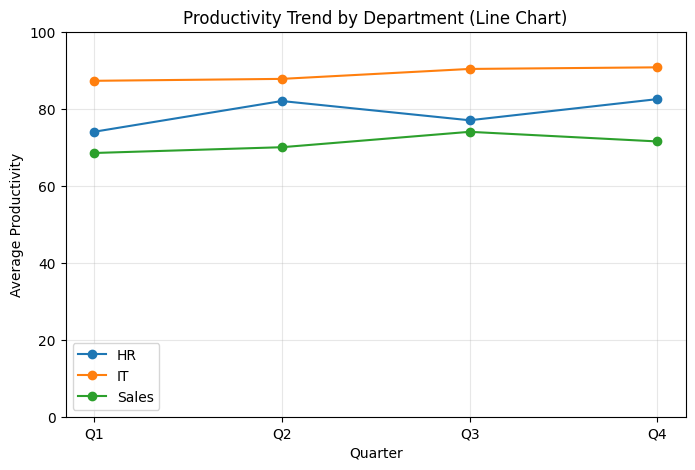

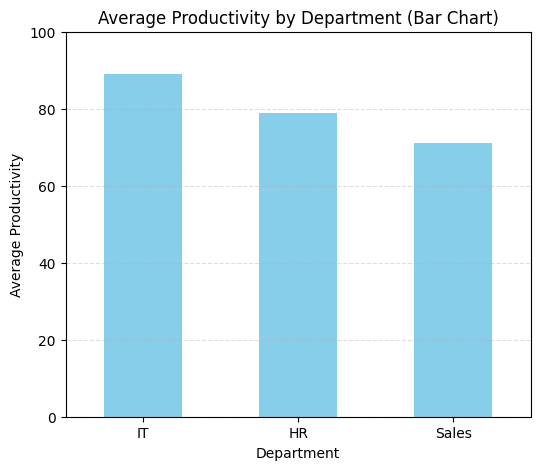

In [1]:
# employee_productivity_line_bar.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load dataset ---
data = {
    "Emp_ID": [201,202,203,204,205,206,202,207,208,209],
    "Department": ["IT","HR","IT","Sales","HR","IT","HR","Sales","Sales","IT"],
    "Q1": [80,70,90,None,78,88,70,65,72,91],
    "Q2": [85,None,95,65,82,84,None,70,75,87],
    "Q3": [None,75,92,70,79,90,75,None,78,89],
    "Q4": [90,80,94,75,85,86,80,68,None,93]
}
df = pd.DataFrame(data)

# --- Data Cleaning ---
df = df.drop_duplicates(subset=["Emp_ID"], keep="first").reset_index(drop=True)
quarters = ["Q1","Q2","Q3","Q4"]
dept_means = df.groupby("Department")[quarters].mean()

def impute_row(row):
    dept = row["Department"]
    for q in quarters:
        if pd.isna(row[q]):
            dept_mean = dept_means.loc[dept, q]
            if pd.isna(dept_mean):
                row[q] = df[q].mean()
            else:
                row[q] = dept_mean
    return row

df = df.apply(impute_row, axis=1)
df[quarters] = df[quarters].astype(float)

# --- Visualization 1: Line Chart ---
trend_by_dept = df.groupby("Department")[quarters].mean().T
plt.figure(figsize=(8,5))
for dept in trend_by_dept.columns:
    plt.plot(trend_by_dept.index, trend_by_dept[dept], marker='o', label=dept)
plt.title("Productivity Trend by Department (Line Chart)")
plt.xlabel("Quarter")
plt.ylabel("Average Productivity")
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Visualization 2: Bar Chart ---
df["Avg_All_Q"] = df[quarters].mean(axis=1)
dept_avg = df.groupby("Department")["Avg_All_Q"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,5))
dept_avg.plot(kind="bar", color="skyblue")
plt.title("Average Productivity by Department (Bar Chart)")
plt.ylabel("Average Productivity")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


/tmp/ipython-input-1788256289.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[q] for q in quarters], labels=quarters, showmeans=True)


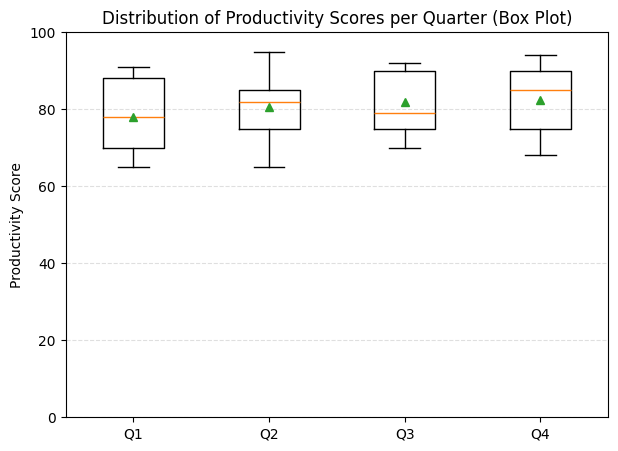

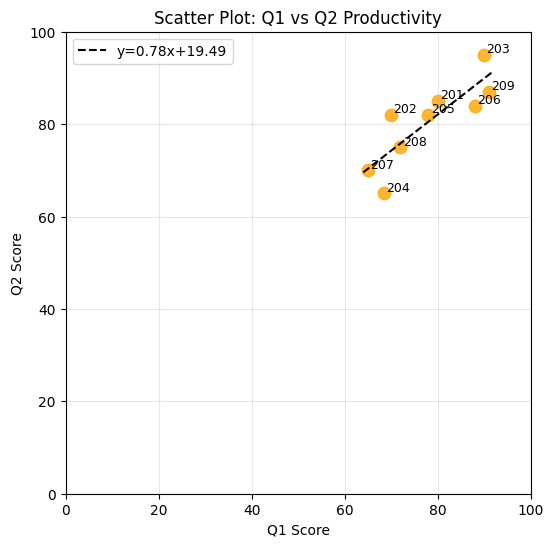

In [2]:
# employee_productivity_box_scatter.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load dataset ---
data = {
    "Emp_ID": [201,202,203,204,205,206,202,207,208,209],
    "Department": ["IT","HR","IT","Sales","HR","IT","HR","Sales","Sales","IT"],
    "Q1": [80,70,90,None,78,88,70,65,72,91],
    "Q2": [85,None,95,65,82,84,None,70,75,87],
    "Q3": [None,75,92,70,79,90,75,None,78,89],
    "Q4": [90,80,94,75,85,86,80,68,None,93]
}
df = pd.DataFrame(data)

# --- Data Cleaning ---
df = df.drop_duplicates(subset=["Emp_ID"], keep="first").reset_index(drop=True)
quarters = ["Q1","Q2","Q3","Q4"]
dept_means = df.groupby("Department")[quarters].mean()

def impute_row(row):
    dept = row["Department"]
    for q in quarters:
        if pd.isna(row[q]):
            dept_mean = dept_means.loc[dept, q]
            if pd.isna(dept_mean):
                row[q] = df[q].mean()
            else:
                row[q] = dept_mean
    return row

df = df.apply(impute_row, axis=1)
df[quarters] = df[quarters].astype(float)

# --- Visualization 1: Box Plot ---
plt.figure(figsize=(7,5))
plt.boxplot([df[q] for q in quarters], labels=quarters, showmeans=True)
plt.title("Distribution of Productivity Scores per Quarter (Box Plot)")
plt.ylabel("Productivity Score")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

# --- Visualization 2: Scatter Plot (Q1 vs Q2) ---
plt.figure(figsize=(6,6))
plt.scatter(df["Q1"], df["Q2"], s=80, color="orange", alpha=0.8)
for i, r in df.iterrows():
    plt.text(r["Q1"]+0.5, r["Q2"]+0.5, str(int(r["Emp_ID"])), fontsize=9)
plt.title("Scatter Plot: Q1 vs Q2 Productivity")
plt.xlabel("Q1 Score")
plt.ylabel("Q2 Score")
plt.xlim(0, 100)
plt.ylim(0, 100)

# Regression trend line
m, b = np.polyfit(df["Q1"], df["Q2"], 1)
x_vals = np.array([df["Q1"].min() - 1, df["Q1"].max() + 1])
plt.plot(x_vals, m*x_vals + b, linestyle="--", color="black", label=f"y={m:.2f}x+{b:.2f}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
